In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

csvPath1 = 'raw_data\clinicaltrial_data.csv'
csvPath2 = 'raw_data\mouse_drug_data.csv'

clin_df = pd.read_csv(csvPath1)
mouse_df = pd.read_csv(csvPath2)

clin_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
#merge the two dataframes by mouse id
results_df = clin_df.merge(mouse_df, on='Mouse ID')
results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [4]:
#Tumor Response to Treatment

drugGroup = results_df.groupby(['Drug', 'Timepoint']).mean()
drugGroup


Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
          25                  39.939528          0.818182
          30                  38.769339          1.090909
          35                  37.816839          1.181818
          40                  36.958001          1.380952
          45                  36.236114          1.476190
Ceftamin  0                   45.000000          0.000000
          5                   46.503051          0.380952
          10                  48.285125          0.600000
          15                  50.094055          0.789474
          20                  52.157049          1.111111
          25                  54.287674          1.500000
          30                  56.769517          1.937500
          35                  58.827548          2.071429
          40                  61.467895          2.357143
          45                  64.132421          2.692308
Infubinol 0                   45.000000          0.000000
          5                   47.062001          0.280000
          10                  49.403909          0.666667
          15                  51.296397          0.904762
          20                  53.197691          1.050000
          25                  55.715252          1.277778
          30                  58.299397          1.588235
          35                  60.742461          1.666667
          40                  63.162824          2.100000
          45                  65.755562          2.111111
...                                 ...               ...
Ramicane  0                   45.000000          0.000000
          5                   43.944859          0.120000
          10                  42.531957          0.250000
          15                  41.495061          0.333333
          20                  40.238325          0.347826
          25                  38.974300          0.652174
          30                  38.703137          0.782609
          35                  37.451996          0.952381
          40                  36.574081          1.100000
          45                  34.955595          1.250000
Stelasyn  0                   45.000000          0.000000
          5                   47.527452          0.240000
          10                  49.463844          0.478261
          15                  51.529409          0.782609
          20                  54.067395          0.952381
          25                  56.166123          1.157895
          30                  59.826738          1.388889
          35                  62.440699          1.562500
          40                  65.356386          1.583333
          45                  68.438310          1.727273
Zoniferol 0                   45.000000          0.000000
          5                   46.851818          0.166667
          10                  48.689881          0.500000
          15                  50.779059          0.809524
          20                  53.170334          1.294118
          25                  55.432935          1.687500
          30                  57.713531          1.933333
          35                  60.089372          2.285714
          40                  62.916692          2.785714
          45                  65.960888          3.071429

[100 rows x 2 columns]

In [10]:
#pivot table of time vs. drug for tumor volume

drugTable = pd.pivot_table(drugGroup, values = 'Tumor Volume (mm3)', index = 'Timepoint', columns = 'Drug')

drugTable

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


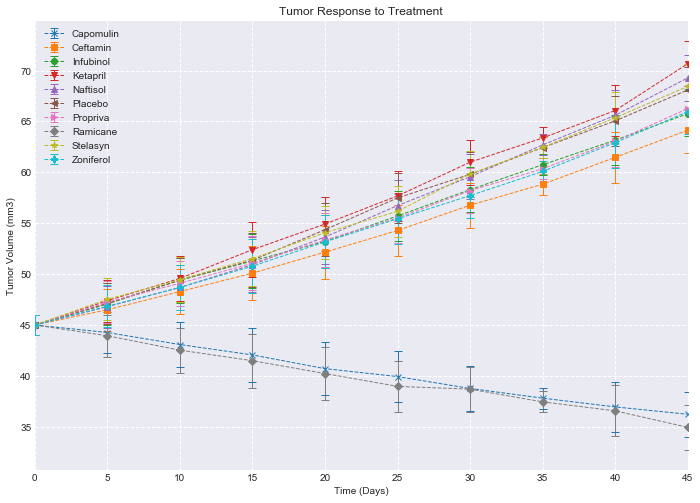

In [13]:
#plot of pivot table

#***Scatter plot using line plot with markers just like in example
### makePlot == graphs a pivot table with (index==Timepoint) & (column==a specific drug) 
def makePlot(table):
    #Get a different marker/dot for each drug
    mark_list = ["x", "s", "o", "v", "^", "<", ">", "D", "*", "P"]
    markNum = 0
    #get standard error of the mean
    tableSEM = table.sem()
    #loop through each column to get different marker for each drug (n==10)
    for column in table.columns:
        #plot line by connecting errorbars 
        plt.errorbar(x=table.index, y=table[column], yerr= tableSEM, data=table, marker = mark_list[markNum],\
                     label=column, capsize=4, ls= '--', lw=1)
        markNum += 1

#make graph
    #change figure size
fig, ax = plt.subplots()
    # the size of A4 paper
fig.set_size_inches(11.7, 8.27) 
#make plot from pivot table
makePlot(drugTable)
sns.set_style('dark')  
ax.grid(linestyle='--', linewidth=1)
ax.set_xlim(0, 45)
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response to Treatment')
plt.legend()
plt.show()


In [11]:
#pivot table of time vs. drug for Metastatic Sites

drugTableM = pd.pivot_table(drugGroup, values = 'Metastatic Sites', index = 'Timepoint', columns = 'Drug')
drugTableM

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


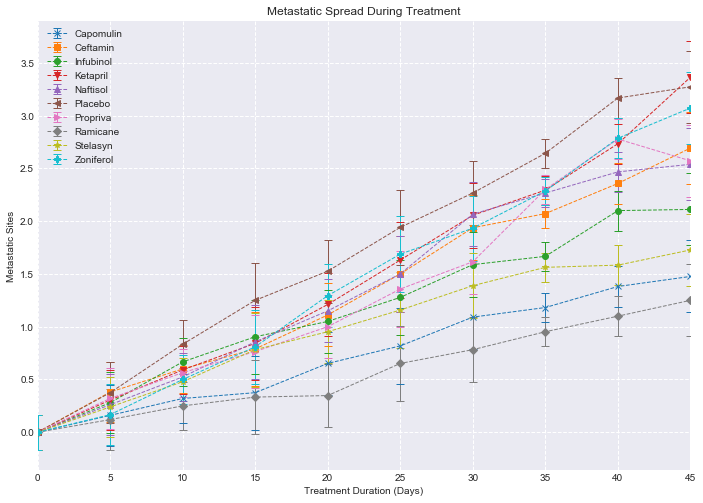

In [7]:
#Make scatterplot using makePlot() defined 2 cells above
#change figure size
fig, ax = plt.subplots()
    # the size of A4 paper
fig.set_size_inches(11.7, 8.27) 
#make plot from pivot table
makePlot(drugTableM)
ax.grid(linestyle='--', linewidth=1)
ax.set_xlim(0, 45)
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')
plt.legend()
plt.show()

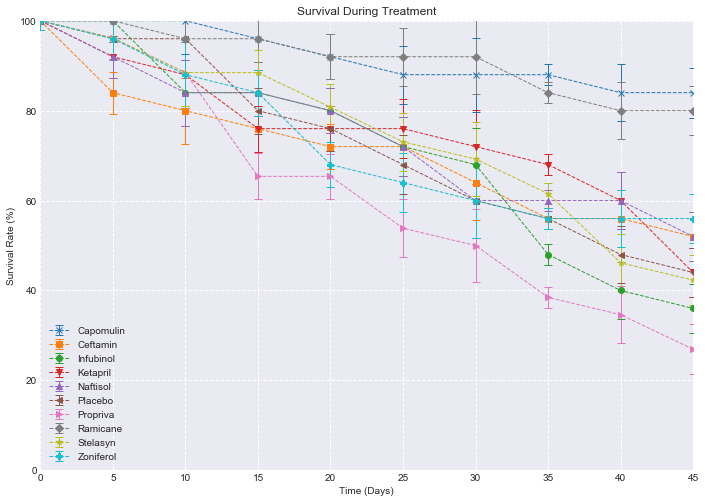

In [8]:
#Survival rate over time of mice for each drug
#The count of mice for each time period
mouseNum = results_df.groupby(['Drug', 'Timepoint']).count()
#The count of mice at the beginning 
mouseNStart = results_df[results_df['Timepoint']==0].groupby(['Drug']).count()
mouseNStart_s = pd.Series(mouseNStart['Mouse ID'])
#Get % of surviving mice by dividing mice count from starting mice count
mouseSurv = mouseNum['Mouse ID'].div(mouseNStart_s, level='Drug') * 100
mouseSurv = pd.DataFrame(data=mouseSurv)
mouseSurvTable = pd.pivot_table(mouseSurv, values = 'Mouse ID', index = 'Timepoint', columns = 'Drug')

#make Graph
#change figure size
fig, ax = plt.subplots()
    # the size of A4 paper
fig.set_size_inches(11.7, 8.27)
#make plot from pivot table
makePlot(mouseSurvTable)
ax.grid(linestyle='--', linewidth=1)
ax.set_xlim(0, 45)
ax.set_ylim(0, 100)
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.legend()
plt.show()


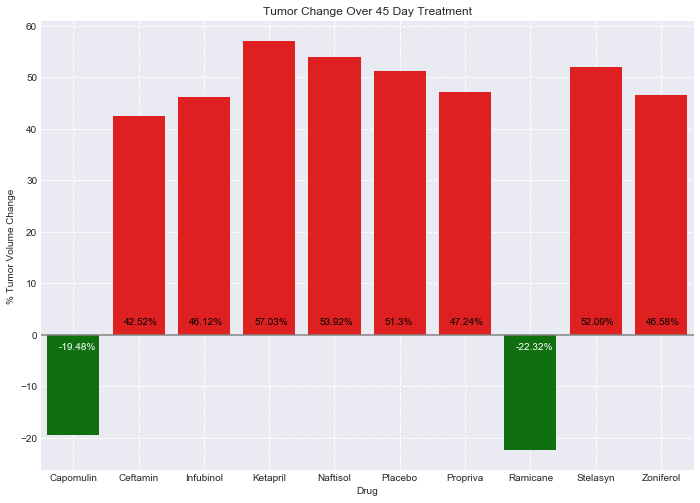

In [20]:
# Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
#drugTable from pivot table of tumor volume section
#Gets row & column where timepoint == 0 and timepoint == 45 
TumorStart = drugTable.xs(0)
TumorEnd = drugTable.xs(45)
#percent change = (new - old)/old times 100
def percChng(end, start):
    Change = ((end - start)/start) * 100
    return round(Change, 2)
TumorChng = percChng(TumorEnd, TumorStart)
TumorChng_df = pd.DataFrame(TumorChng)
TumorChng_df = TumorChng_df.rename(columns={0:'Tumor Change (%)'})

#color list where positive change == red & neg chng == green
color_ls = []
for i in TumorChng:
    if i >= 0:
        color_ls.append('r')
    else:
        color_ls.append('g')

#change figure size
fig, ax = plt.subplots()
    # the size of A4 paper
fig.set_size_inches(11.7, 8.27)   

#bargraph of the results
sns.barplot(x= TumorChng_df.index ,y='Tumor Change (%)', data=TumorChng_df, palette=color_ls, orient='v')

#add annotations for each graph
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(str(p.get_height()) + '%', (p.get_x() + .17, 2), color='black')
    else:
        ax.annotate(str(p.get_height()) + '%', (p.get_x() + .17, -2.75), color='white')
        
ax.grid(linestyle='--', linewidth=1)
ax.axhline(color='gray')
plt.title('Tumor Change Over 45 Day Treatment')
plt.ylabel('% Tumor Volume Change')
plt.show()